In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from IPython.display import set_matplotlib_formats


In [2]:
data = pd.read_csv('./diamonds_train.csv')
data.head()

carat        cut color clarity  depth  table  price     x     y     z
0   1.21    Premium     J     VS2   62.4   58.0   4268  6.83  6.79  4.25
1   0.32  Very Good     H     VS2   63.0   57.0    505  4.35  4.38  2.75
2   0.71       Fair     G     VS1   65.5   55.0   2686  5.62  5.53  3.65
3   0.41       Good     D     SI1   63.8   56.0    738  4.68  4.72  3.00
4   1.02      Ideal     G     SI1   60.5   59.0   4882  6.55  6.51  3.95

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [ ]:
# in the following cells, functions are created, which are used to analyze the data set.
# the explanations of the functions can be found below in the file, where the functions are applied.

In [4]:
def get_df_binned_price(x):
    bins = []
    name_bin = []
    for numero in range(0,22000,2000):
        bins.append(numero)
    for num in range(0,10):
        name_bin.append(num)
    df = data
    df['binned'] = pd.cut(df['price'], bins=bins, labels = name_bin)
    filter = df['binned'] == x
    df_binned = df[filter]
    print(len(df_binned))
    return df_binned
    

In [5]:
def get_df_filtered_cut(x, df):
    filter_cut = df['cut'] == x
    df_cut = df[filter_cut]
    print(len(df_cut))
    return df_cut

In [6]:
def get_df_filtered_clarity(x, df):
    filter_clarity = df['clarity'] == x
    df_clarity = df[filter_clarity]
    print(len(df_clarity))
    return df_clarity

In [7]:
def get_df_filtered_color(x, df):
    filter_color = df['color'] == x
    df_color = df[filter_color]
    print(len(df_color))
    return df_color

In [8]:
def get_df_filtered_measures_higher(x, df):
    filter_measures = df['measures'] > x
    df_measures = df[filter_measures]
    print(len(df_measures))
    return df_measures

In [9]:
def get_df_filtered_cut_clarity_color(x,y,z,df):
    filter_cut = df['cut'] == x
    filter_clarity = df['clarity'] == y
    filter_color = df['color'] == z
    filter_all = filter_cut & filter_clarity & filter_color
    df_all_filtered = df[filter_all]
    print(len(df_all_filtered))
    return df_all_filtered

In [10]:
def get_df_filter_carat_lower(x, df):
    filter_carat = df['carat'] < x
    df_carat = df[filter_carat]
    print(len(df_carat))
    return df_carat

In [11]:
def filter_carat_lower(x, df):
    filter_carat = df['carat'] < x
    df_carat = df[filter_carat]
    pie_charts_non_numeric(df_carat)
    print('There are', len(df_carat), 'diamonds in the list which have a carat value below', x, ' the min. mean and max price is' ,
          df_carat['price'].min(), df_carat['price'].mean() , df_carat['price'].max()) 
    return 


In [12]:
def pie_charts_non_numeric(df):
     Cu = pd.Series(df['cut'], name = '')
     Cl = pd.Series(df['clarity'], name = '')
     Co = pd.Series(df['color'], name = '')   
     c_cut_dict = {'Ideal': 'r', 'Premium': 'm', 'Very Good': 'g', 'Good':'c', 'Fair':'y'}
     colors_cut = [c_cut_dict[x] for x in list(Cu.value_counts().index)] 
     c_clarity_dict = {'SI1': 'r', 'VS2': 'm', 'SI2': 'g', 'VS1':'c', 'VVS2':'y', 'VVS1':'k', 'IF':'b' , 'I1':'lime'}
     colors_clarity = [c_clarity_dict[x] for x in list(Cl.value_counts().index)] 
     c_color_dict = {'G': 'r', 'E': 'm', 'F': 'g', 'H':'c', 'D':'y', 'I':'k', 'J':'b'}
     colors_colors = [c_color_dict[x] for x in list(Co.value_counts().index)] 
     fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 6))
     cut = Cu.value_counts().plot(ax = axes[0], kind = 'pie', colors = colors_cut, title='cut distribution in %', autopct='%.2f')
     cut.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), ncol=1);
     clarity = Cl.value_counts().plot(ax = axes[1], kind = 'pie', colors = colors_clarity, title = 'clarity distribution in %',autopct='%.2f')
     clarity.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), ncol=1);
     color = Co.value_counts().plot(ax = axes[2], kind = 'pie', colors = colors_colors, title = 'color distribution in %', autopct='%.2f')
     color.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), ncol=1);
     plt.subplots_adjust(wspace=1.5);   
     return cut; clarity; color

In [13]:
def scatter_carat_price(df):
    c_cut_dict = {'Ideal': 'r', 'Premium': 'm', 'Very Good': 'g', 'Good':'c', 'Fair':'y'}
    c_clarity_dict = {'SI1': 'r', 'VS2': 'm', 'SI2': 'g', 'VS1':'c', 'VVS2':'y', 'VVS1':'k', 'IF':'b' , 'I1':'lime'}
    c_color_dict = {'G': 'r', 'E': 'm', 'F': 'g', 'H':'c', 'D':'y', 'I':'k', 'J':'b'}
    fig, axes = plt.subplots(ncols=3, nrows = 1 ,figsize=(24,8))
    ax1 = sns.scatterplot(ax = axes[0], x ='carat', y = 'price', hue='cut', data=df, palette = c_cut_dict)
    axes[0].set(ylim=(0, 19000))
    axes[0].set(xlim=(0,5))
    axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax2 = sns.scatterplot(ax = axes[1], x ='carat', y = 'price', hue='clarity', data=df, palette = c_clarity_dict)
    axes[1].set(ylim=(0, 19000))
    axes[1].set(xlim=(0,5));
    axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax3 = sns.scatterplot(ax = axes[2], x ='carat', y = 'price', hue='color', data=df, palette = c_color_dict)
    axes[2].set(ylim=(0, 19000))
    axes[2].set(xlim=(0,5));
    axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    plt.subplots_adjust(wspace=0.6);   
    return ax1; ax2; ax3;

In [14]:
def scatter_carat_price_filtered(df1, df2, df3):
    c_cut_dict = {'Ideal': 'r', 'Premium': 'm', 'Very Good': 'g', 'Good':'c', 'Fair':'y'}
    c_clarity_dict = {'SI1': 'r', 'VS2': 'm', 'SI2': 'g', 'VS1':'c', 'VVS2':'y', 'VVS1':'k', 'IF':'b' , 'I1':'lime'}
    c_color_dict = {'G': 'r', 'E': 'm', 'F': 'g', 'H':'c', 'D':'y', 'I':'k', 'J':'b'}
    fig, axes = plt.subplots(ncols=3, nrows = 1 ,figsize=(24,8))
    ax1 = sns.scatterplot(ax = axes[0], x ='carat', y = 'price', hue='cut', data=df1, palette = c_cut_dict)
    axes[0].set(ylim=(0, 19000))
    axes[0].set(xlim=(0,5))
    axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax2 = sns.scatterplot(ax = axes[1], x ='carat', y = 'price', hue='clarity', data=df2, palette = c_clarity_dict)
    axes[1].set(ylim=(0, 19000))
    axes[1].set(xlim=(0,5))
    axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax3 = sns.scatterplot(ax = axes[2], x ='carat', y = 'price', hue='color', data=df3, palette = c_color_dict)
    axes[2].set(ylim=(0, 19000))
    axes[2].set(xlim=(0,5))
    axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    plt.subplots_adjust(wspace=0.6);   
    return ax1; ax2; ax3;

In [15]:
def scatter_depth_price(df):
    c_cut_dict = {'Ideal': 'r', 'Premium': 'm', 'Very Good': 'g', 'Good':'c', 'Fair':'y'}
    c_clarity_dict = {'SI1': 'r', 'VS2': 'm', 'SI2': 'g', 'VS1':'c', 'VVS2':'y', 'VVS1':'k', 'IF':'b' , 'I1':'lime'}
    c_color_dict = {'G': 'r', 'E': 'm', 'F': 'g', 'H':'c', 'D':'y', 'I':'k', 'J':'b'}
    fig, axes = plt.subplots(ncols=3, nrows = 1 ,figsize=(24,8))
    ax1 = sns.scatterplot(ax = axes[0], x ='depth', y = 'price', hue='cut', data=df, palette = c_cut_dict)
    axes[0].set(ylim=(0, 19000))
    axes[0].set(xlim=(40,80))
    axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax2 = sns.scatterplot(ax = axes[1], x ='depth', y = 'price', hue='clarity', data=df, palette = c_clarity_dict);
    axes[1].set(ylim=(0, 19000))
    axes[1].set(xlim=(40,80))
    axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax3 = sns.scatterplot(ax = axes[2], x ='depth', y = 'price', hue='color', data=df, palette = c_color_dict)
    axes[2].set(ylim=(0, 19000))
    axes[2].set(xlim=(40,80))
    axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    plt.subplots_adjust(wspace=0.6);   
    return ax1; ax2; ax3;

In [16]:
def scatter_table_price(df):    
    c_cut_dict = {'Ideal': 'r', 'Premium': 'm', 'Very Good': 'g', 'Good':'c', 'Fair':'y'}
    c_clarity_dict = {'SI1': 'r', 'VS2': 'm', 'SI2': 'g', 'VS1':'c', 'VVS2':'y', 'VVS1':'k', 'IF':'b' , 'I1':'lime'}
    c_color_dict = {'G': 'r', 'E': 'm', 'F': 'g', 'H':'c', 'D':'y', 'I':'k', 'J':'b'}
    fig, axes = plt.subplots(ncols=3, nrows = 1 ,figsize=(24,8))
    ax1 = sns.scatterplot(ax = axes[0], x ='table', y = 'price', hue='cut', data=df, palette = c_cut_dict)
    axes[0].set(ylim=(0, 19000))
    axes[0].set(xlim=(40,80))
    axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax2 = sns.scatterplot(ax = axes[1], x ='table', y = 'price', hue='clarity', data=df, palette = c_clarity_dict)
    axes[1].set(ylim=(0, 19000))
    axes[1].set(xlim=(40,80))
    axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax3 = sns.scatterplot(ax = axes[2], x ='table', y = 'price', hue='color', data=df, palette = c_color_dict)
    axes[2].set(ylim=(0, 19000))
    axes[2].set(xlim=(40,80))
    axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    plt.subplots_adjust(wspace=0.6);   
    return ax1; ax2; ax3;

In [17]:
 def scatter_prop_price(df):    
    c_cut_dict = {'Ideal': 'r', 'Premium': 'm', 'Very Good': 'g', 'Good':'c', 'Fair':'y'}
    c_clarity_dict = {'SI1': 'r', 'VS2': 'm', 'SI2': 'g', 'VS1':'c', 'VVS2':'y', 'VVS1':'k', 'IF':'b' , 'I1':'lime'}
    c_color_dict = {'G': 'r', 'E': 'm', 'F': 'g', 'H':'c', 'D':'y', 'I':'k', 'J':'b'}
    df['prop'] = df.apply(lambda x: x['y']/ x['x'] if x['x'] != 0 else 0, axis=1)
    df['prop'] = df.apply(lambda x: x['prop'] if 0.89 < x['prop'] < 1.1 else 1, axis=1)
    fig, axes = plt.subplots(ncols=3, nrows = 1 ,figsize=(24,8))
    ax1 = sns.scatterplot(ax = axes[0], x ='prop', y = 'price', hue='cut', data=df, palette = c_cut_dict)
    axes[0].set(ylim=(0, 19000))
    axes[0].set(xlim=(0.89,1.1))
    axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax2 = sns.scatterplot(ax = axes[1], x ='prop', y = 'price', hue='clarity', data=df, palette = c_clarity_dict)
    axes[1].set(ylim=(0, 19000))
    axes[1].set(xlim=(0.89,1.1))
    axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax3 = sns.scatterplot(ax = axes[2], x ='prop', y = 'price', hue='color', data=df, palette = c_color_dict)
    axes[2].set(ylim=(0, 19000))
    axes[2].set(xlim=(0.89,1.1))
    axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    plt.subplots_adjust(wspace=0.6);   
    return ax1; ax2; ax3;
   

In [18]:
 def scatter_z_price(df):    
    c_cut_dict = {'Ideal': 'r', 'Premium': 'm', 'Very Good': 'g', 'Good':'c', 'Fair':'y'}
    c_clarity_dict = {'SI1': 'r', 'VS2': 'm', 'SI2': 'g', 'VS1':'c', 'VVS2':'y', 'VVS1':'k', 'IF':'b' , 'I1':'lime'}
    c_color_dict = {'G': 'r', 'E': 'm', 'F': 'g', 'H':'c', 'D':'y', 'I':'k', 'J':'b'}
    fig, axes = plt.subplots(ncols=3, nrows = 1 ,figsize=(24,8))
    ax1 = sns.scatterplot(ax = axes[0], x ='z', y = 'price', hue='cut', data=df, palette = c_cut_dict)
    axes[0].set(ylim=(0, 19000))
    axes[0].set(xlim=(-1,8))
    axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax2 = sns.scatterplot(ax = axes[1], x ='z', y = 'price', hue='clarity', data=df, palette = c_clarity_dict)
    axes[1].set(ylim=(0, 19000))
    axes[1].set(xlim=(-1,8))
    axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax3 = sns.scatterplot(ax = axes[2], x ='z', y = 'price', hue='color', data=df, palette = c_color_dict)
    axes[2].set(ylim=(0, 19000))
    axes[2].set(xlim=(-1,8))
    axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    plt.subplots_adjust(wspace=0.6);   
    return ax1; ax2; ax3;
    

In [44]:
 def scatter_measures_price(df):    
    c_cut_dict = {'Ideal': 'r', 'Premium': 'm', 'Very Good': 'g', 'Good':'c', 'Fair':'y'}
    c_clarity_dict = {'SI1': 'r', 'VS2': 'm', 'SI2': 'g', 'VS1':'c', 'VVS2':'y', 'VVS1':'k', 'IF':'b' , 'I1':'lime'}
    c_color_dict = {'G': 'r', 'E': 'm', 'F': 'g', 'H':'c', 'D':'y', 'I':'k', 'J':'b'}
    fig, axes = plt.subplots(ncols=3, nrows = 1 ,figsize=(24,8))
    ax1 = sns.scatterplot(ax = axes[0], x ='measures', y = 'price', hue='cut', data=df, palette = c_cut_dict)
    axes[0].set(ylim=(0, 19000))
    axes[0].set(xlim=(-5,300))
    axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax2 = sns.scatterplot(ax = axes[1], x ='measures', y = 'price', hue='clarity', data=df, palette = c_clarity_dict)
    axes[1].set(ylim=(0, 19000))
    axes[1].set(xlim=(-5,300))
    axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax3 = sns.scatterplot(ax = axes[2], x ='measures', y = 'price', hue='color', data=df, palette = c_color_dict)
    axes[2].set(ylim=(0, 19000))
    axes[2].set(xlim=(-5,300))
    axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    plt.subplots_adjust(wspace=0.6);   
    return ax1; ax2; ax3;
    

In [61]:
def scatter_z_price_filtered(df1, df2, df3):
    c_cut_dict = {'Ideal': 'r', 'Premium': 'm', 'Very Good': 'g', 'Good':'c', 'Fair':'y'}
    c_clarity_dict = {'SI1': 'r', 'VS2': 'm', 'SI2': 'g', 'VS1':'c', 'VVS2':'y', 'VVS1':'k', 'IF':'b' , 'I1':'lime'}
    c_color_dict = {'G': 'r', 'E': 'm', 'F': 'g', 'H':'c', 'D':'y', 'I':'k', 'J':'b'}
    fig, axes = plt.subplots(ncols=3, nrows = 1 ,figsize=(24,8))
    ax1 = sns.scatterplot(ax = axes[0], x ='z', y = 'price', hue='cut', data=df1, palette = c_cut_dict)
    axes[0].set(ylim=(0, 19000))
    axes[0].set(xlim=(0,8))
    axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax2 = sns.scatterplot(ax = axes[1], x ='z', y = 'price', hue='clarity', data=df2, palette = c_clarity_dict)
    axes[1].set(ylim=(0, 19000))
    axes[1].set(xlim=(0,8))
    axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax3 = sns.scatterplot(ax = axes[2], x ='z', y = 'price', hue='color', data=df3, palette = c_color_dict)
    axes[2].set(ylim=(0, 19000))
    axes[2].set(xlim=(0,8))
    axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    plt.subplots_adjust(wspace=0.6);   
    return ax1; ax2; ax3;
   

In [20]:
 def scatter_x_price(df):    
    c_cut_dict = {'Ideal': 'r', 'Premium': 'm', 'Very Good': 'g', 'Good':'c', 'Fair':'y'}
    c_clarity_dict = {'SI1': 'r', 'VS2': 'm', 'SI2': 'g', 'VS1':'c', 'VVS2':'y', 'VVS1':'k', 'IF':'b' , 'I1':'lime'}
    c_color_dict = {'G': 'r', 'E': 'm', 'F': 'g', 'H':'c', 'D':'y', 'I':'k', 'J':'b'}
    fig, axes = plt.subplots(ncols=3, nrows = 1 ,figsize=(24,8))
    ax1 = sns.scatterplot(ax = axes[0], x ='x', y = 'price', hue='cut', data=df, palette = c_cut_dict)
    axes[0].set(ylim=(0, 19000))
    axes[0].set(xlim=(-1,10))
    axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax2 = sns.scatterplot(ax = axes[1], x ='x', y = 'price', hue='clarity', data=df, palette = c_clarity_dict)
    axes[1].set(ylim=(0, 19000))
    axes[1].set(xlim=(-1,10))
    axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax3 = sns.scatterplot(ax = axes[2], x ='x', y = 'price', hue='color', data=df, palette = c_color_dict)
    axes[2].set(ylim=(0, 19000))
    axes[2].set(xlim=(-1,10))
    axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    plt.subplots_adjust(wspace=0.6);   
    return ax1; ax2; ax3;
   

In [37]:
 def scatter_y_price(df):    
    c_cut_dict = {'Ideal': 'r', 'Premium': 'm', 'Very Good': 'g', 'Good':'c', 'Fair':'y'}
    c_clarity_dict = {'SI1': 'r', 'VS2': 'm', 'SI2': 'g', 'VS1':'c', 'VVS2':'y', 'VVS1':'k', 'IF':'b' , 'I1':'lime'}
    c_color_dict = {'G': 'r', 'E': 'm', 'F': 'g', 'H':'c', 'D':'y', 'I':'k', 'J':'b'}
    df['y'] = df.apply(lambda x: x['y'] if x['y'] < 20 else 10, axis=1)
    fig, axes = plt.subplots(ncols=3, nrows = 1 ,figsize=(24,8))
    ax1 = sns.scatterplot(ax = axes[0], x ='y', y = 'price', hue='cut', data=df, palette = c_cut_dict)
    axes[0].set(ylim=(0, 19000))
    axes[0].set(xlim=(-1,10))
    axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax2 = sns.scatterplot(ax = axes[1], x ='y', y = 'price', hue='clarity', data=df, palette = c_clarity_dict)
    axes[1].set(ylim=(0, 19000))
    axes[1].set(xlim=(-1,10))
    axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    ax3 = sns.scatterplot(ax = axes[2], x ='y', y = 'price', hue='color', data=df, palette = c_color_dict)
    axes[2].set(ylim=(0, 19000))
    axes[2].set(xlim=(-1,10))
    axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);
    plt.subplots_adjust(wspace=0.6);   
    return ax1; ax2; ax3;
   

In [21]:
def numeric_data(df):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6,) = plt.subplots(ncols=6, nrows=1, figsize=(18,6), sharey = True)
    ax1.violinplot(df['x']);
    ax1.set_title('x')
    ax2.violinplot(df['y'])
    ax2.set_title('y')
    ax3.violinplot(df['z'])
    ax3.set_title('z')
    ax4.violinplot(df['depth'])
    ax4.set_title('depth')
    ax5.violinplot(df['table'])
    ax5.set_title('table')
    ax6.violinplot(df['prop'])
    ax6.set_title('y/x')
    return 

In [22]:
def average_price(df):
    df_p_cl = df[['price','clarity']]
    df_p_cu = df[['price','cut']]
    df_p_co = df[['price','color']]
    cl = df_p_cl.groupby(['clarity']).mean()
    cu = df_p_cu.groupby(['cut']).mean()
    co = df_p_co.groupby(['color']).mean()
    fig, axes = plt.subplots(ncols=3, nrows = 1 ,figsize=(20,5))
    ax1 = cu.plot( kind = 'bar', ax = axes[0]) 
    ax2 = cl.plot( kind = 'bar', ax = axes[1])
    ax3 = co.plot( kind = 'bar', ax = axes[2])
    return ax1; ax2; ax3;

In [23]:
def ccc_comp(df):
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 4))
    d = df.groupby(['color', 'clarity']).size().unstack().plot(ax = axes[0], kind = 'bar', stacked=True)
    d.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), ncol=1);
    f = df.groupby(['cut', 'clarity']).size().unstack().plot(ax = axes[1], kind = 'bar', stacked=True)
    f.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), ncol=1);
    f = df.groupby(['color', 'cut']).size().unstack().plot(ax = axes[2], kind = 'bar', stacked=True)
    f.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), ncol=1);
    plt.subplots_adjust(wspace=1.5);
    return d; f;

In [ ]:
# Two columns are added to the data frame, to see if they have influence on the price.
# With the correlation matrix, dependencies between the numeric columns are analyzed.

In [41]:
data
data['prop'] = data.apply(lambda x: x['y']/ x['x'] if x['x'] != 0 else 0, axis=1)
data['measures'] = data.apply(lambda x: x['x']*x['y']*x['z'], axis =1)
df_data_numeric = data[['x','y','z','carat', 'price', 'depth', 'table', 'prop', 'measures']]
corrMatrix = df_data_numeric.corr()
corrMatrix

x         y         z     carat     price     depth  \
x         1.000000  0.998211  0.984876  0.975688  0.885848 -0.026348   
y         0.998211  1.000000  0.984329  0.975096  0.887732 -0.029660   
z         0.984876  0.984329  1.000000  0.967570  0.874500  0.094655   
carat     0.975688  0.975096  0.967570  1.000000  0.921935  0.026528   
price     0.885848  0.887732  0.874500  0.921935  1.000000 -0.014864   
depth    -0.026348 -0.029660  0.094655  0.026528 -0.014864  1.000000   
table     0.196059  0.189967  0.155189  0.183392  0.130111 -0.293114   
prop     -0.070716 -0.046818 -0.054871 -0.108628 -0.070767 -0.041494   
measures  0.976738  0.976513  0.973959  0.996392  0.921648  0.008955   

             table      prop  measures  
x         0.196059 -0.070716  0.976738  
y         0.189967 -0.046818  0.976513  
z         0.155189 -0.054871  0.973959  
carat     0.183392 -0.108628  0.996392  
price     0.130111 -0.070767  0.921648  
depth    -0.293114 -0.041494  0.008955  
table     1.000000 -0.108144  0.173345  
prop     -0.108144  1.000000 -0.080316  
measures  0.173345 -0.080316  1.000000

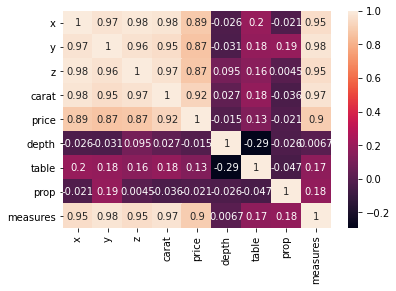

In [25]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# Carat has the highest positive correlation with price (0.92). x,y,z and measures also have a positive correlation with price. 

In [ ]:
# With a violinplots the values of the numeric columns are analyzed, 

count    40455.000000
mean      3928.444469
std       3992.416147
min        326.000000
25%        945.000000
50%       2397.000000
75%       5331.000000
max      18823.000000
Name: price, dtype: float64

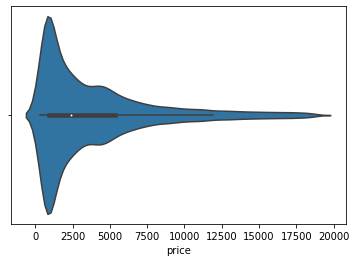

In [26]:
sns.violinplot(data['price']);
data['price'].describe()

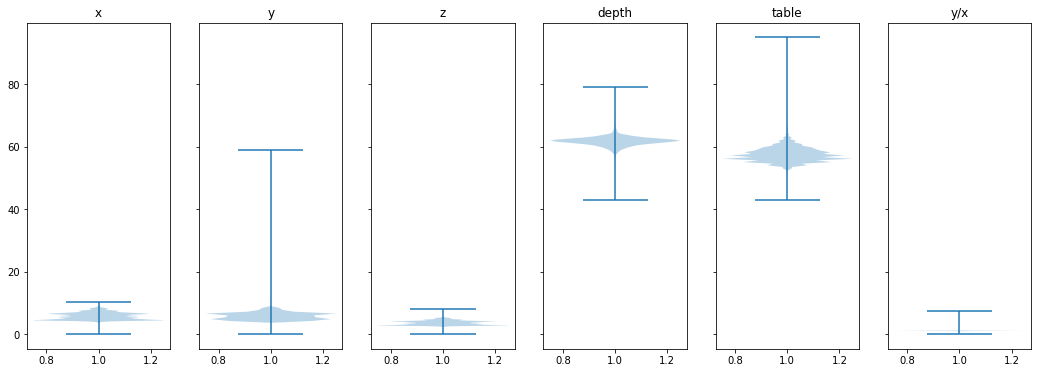

In [27]:
numeric_data(df_data_numeric)


In [28]:
# There is one extreme y value in the y violinplot
filter = data['y'] > 11
data[filter]

carat      cut color clarity  depth  table  price     x     y     z  \
14708    2.0  Premium     H     SI2   58.9   57.0  12210  8.09  58.9  8.06   

           prop    measures  
14708  7.280593  3840.59806

In [ ]:
# Perhaps the extreme value is a mistake?
# All the other values of x, y, and z seem to be in a similar range.

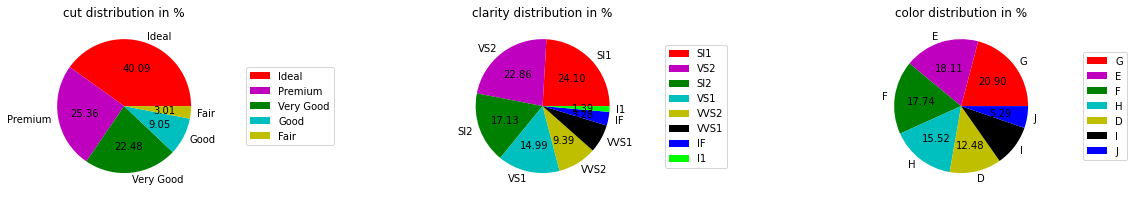

In [29]:
pie_charts_non_numeric(data)
# The pie charts show the distribution of the characteristics of the non numeric columns in the dataset.

In [ ]:
# With the stacked bar chart, it shall be analyzed, if there is a frequency of one characteristic of a non_numeric column which appears with a characteristic of another non_numeric column
#(e.g. Ideal cut often appears with E color)
# There does not seem to be a relationship between the characteristic of the non-numeric columns. 

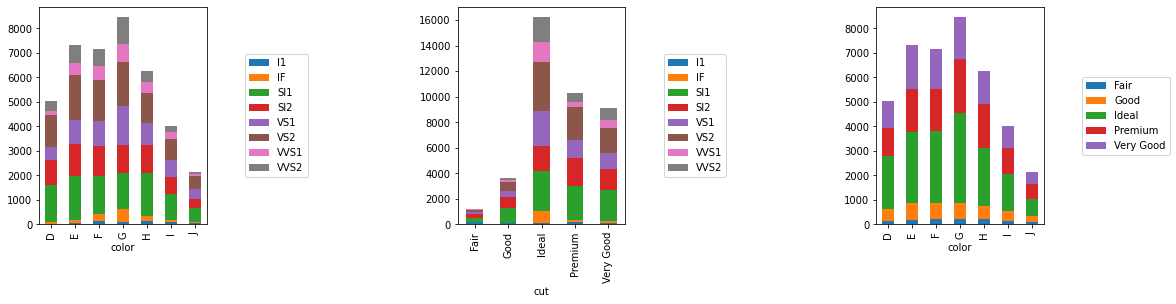

In [30]:
ccc_comp(data)

In [ ]:
# In the following scatter plots, the relationship of the different characteristics and price shall be shown. Price is fixed in all the scatter charts on the y axe.

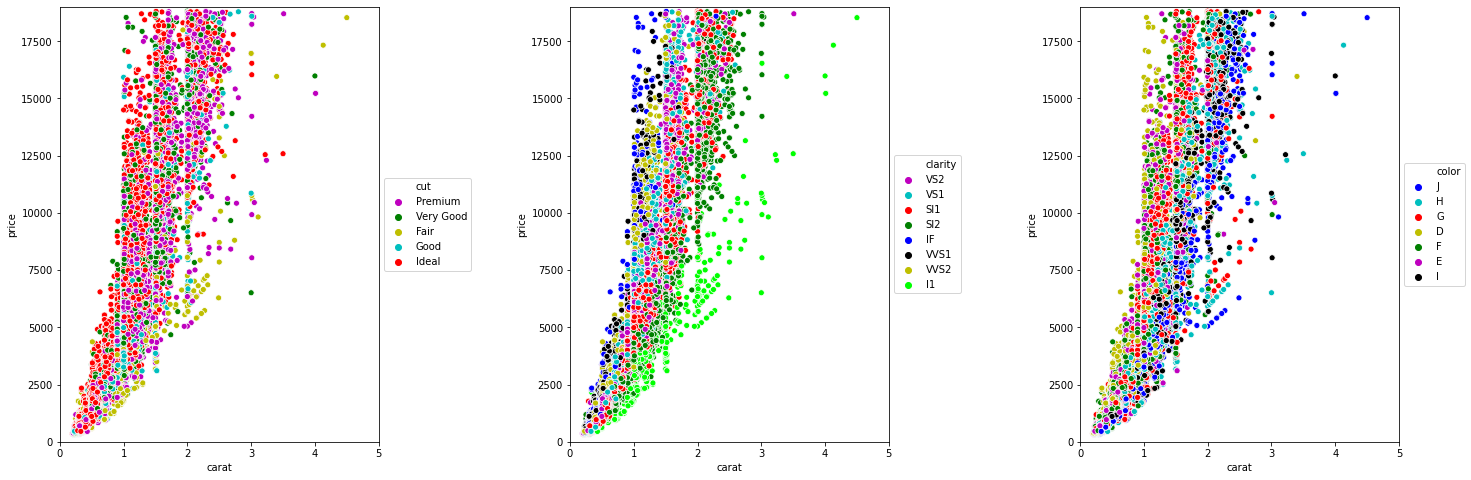

In [31]:

scatter_carat_price(data)

In [10]:
# This scatter plot shows that the carat value has an influence on price (which was already shown with the correlation factor = 0.92)
# The higher the carat value, the higher the price. 
# You can see, that the price also depend on the different characteristic of the non_numeric criteria, e.g. in the color criteria you can see, that diamonds with the color characteristic D
# have a higher price, with a lower carat value than for example diamonds with the color characteristic J.

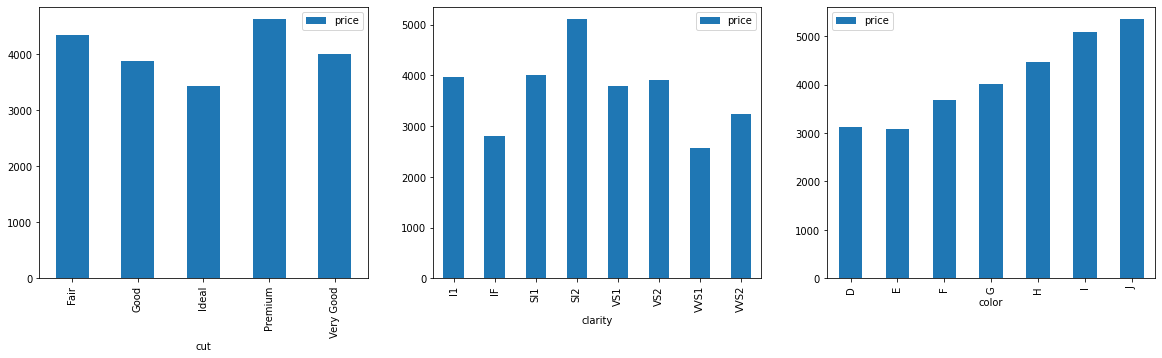

In [78]:
average_price(data)
# In the following bar chart the average prices of the characteristics of the non-numeric citeria are shown. 
# In the previous chart, we have seen, that diamonds with the color D seem to have a higher price (although having a lower carat value), than diamonds with other colors.
# However the average price of D is lower than the price of diamonds with other color values.
# Therefore it seems, that there are stronger influence factors on price of the diamonds than the color characteristic. 

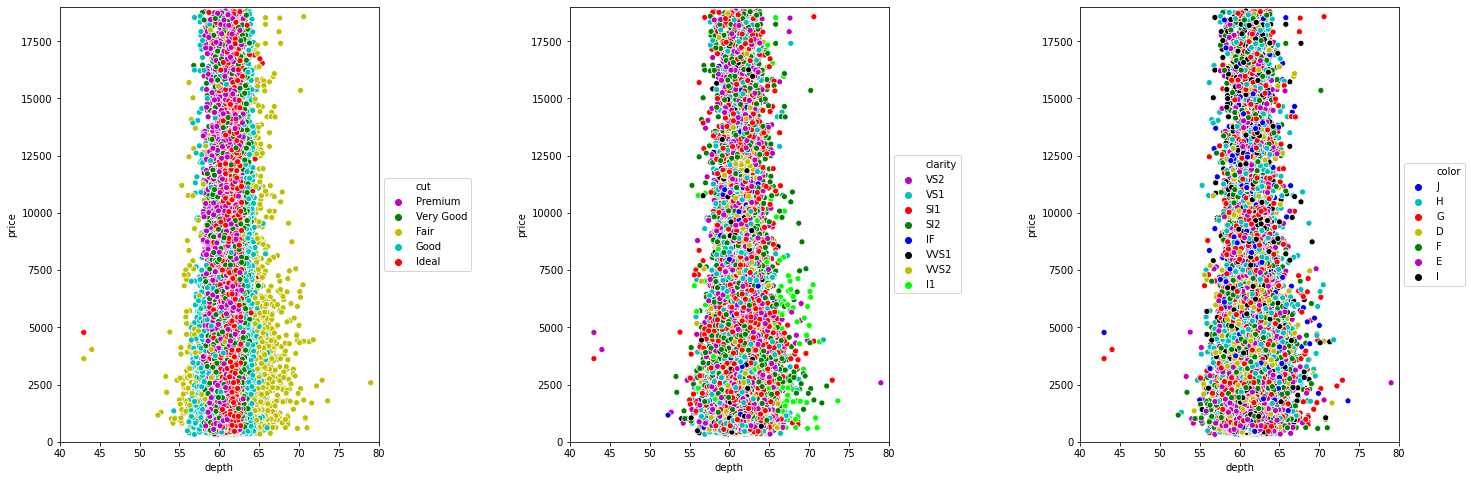

In [32]:
scatter_depth_price(data)

In [ ]:
# Prices seem to be lower, if the depth value is outside the range 56 - 65
# Depth seems to influence the characteristics of the cut criteria
# e.g. fair cut diamonds seem to have depth value outside the range 56 - 65, premium and ideal cut diamonds inside the range. 
# No correlation with price can be seen (which was already obvious in the correlation matrix)


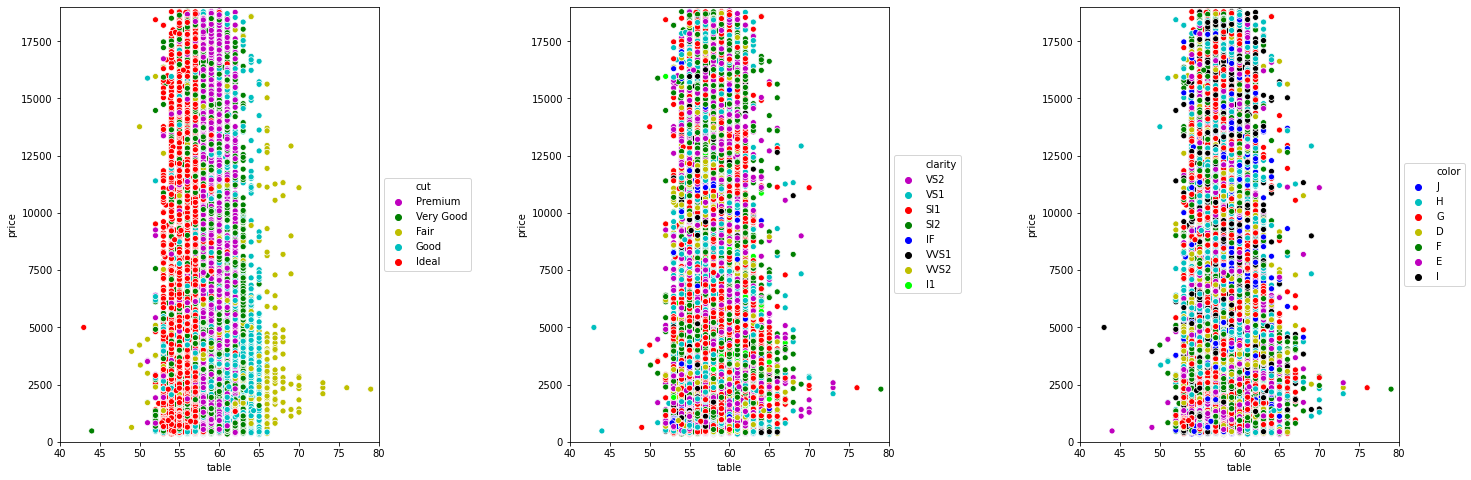

In [33]:
scatter_table_price(data)

In [ ]:
# Prices seem to be lower, if the depth table is outside the range 53 - 63
# The cut characteristics seem to be determined by the table value. 
# no correlation to price 

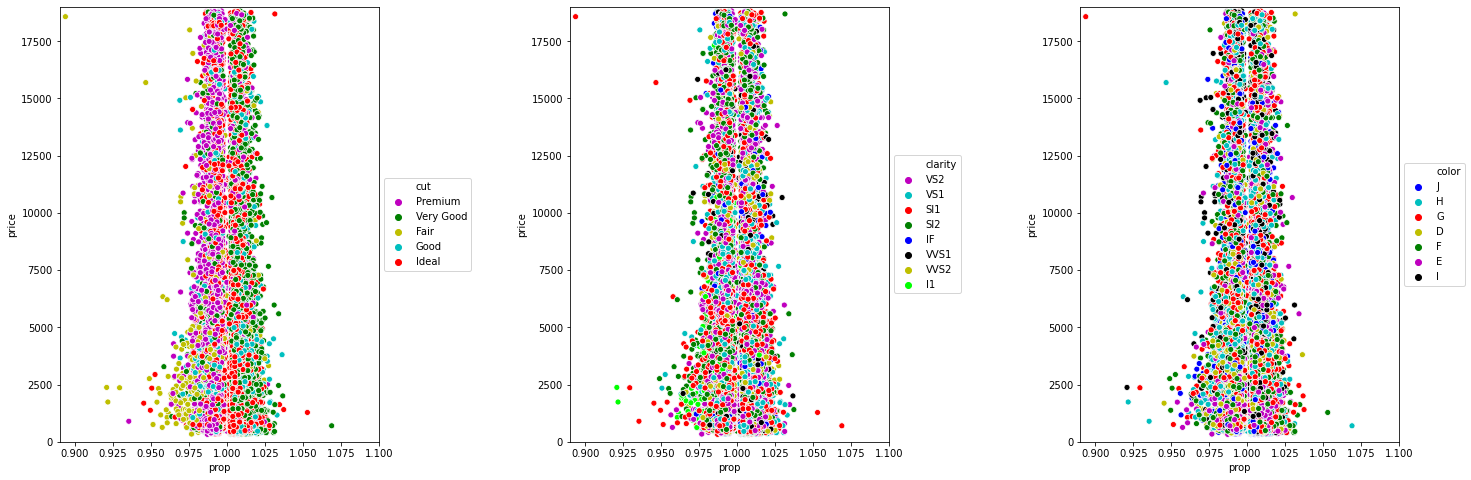

In [34]:
scatter_prop_price(data)

In [ ]:
# Prices seem to be lower, if the prop value is outside the range 0.98 - 1.02
# The cut characteristics seems to be influenced on the the proprtion (y/x) 
# No correlation to price 

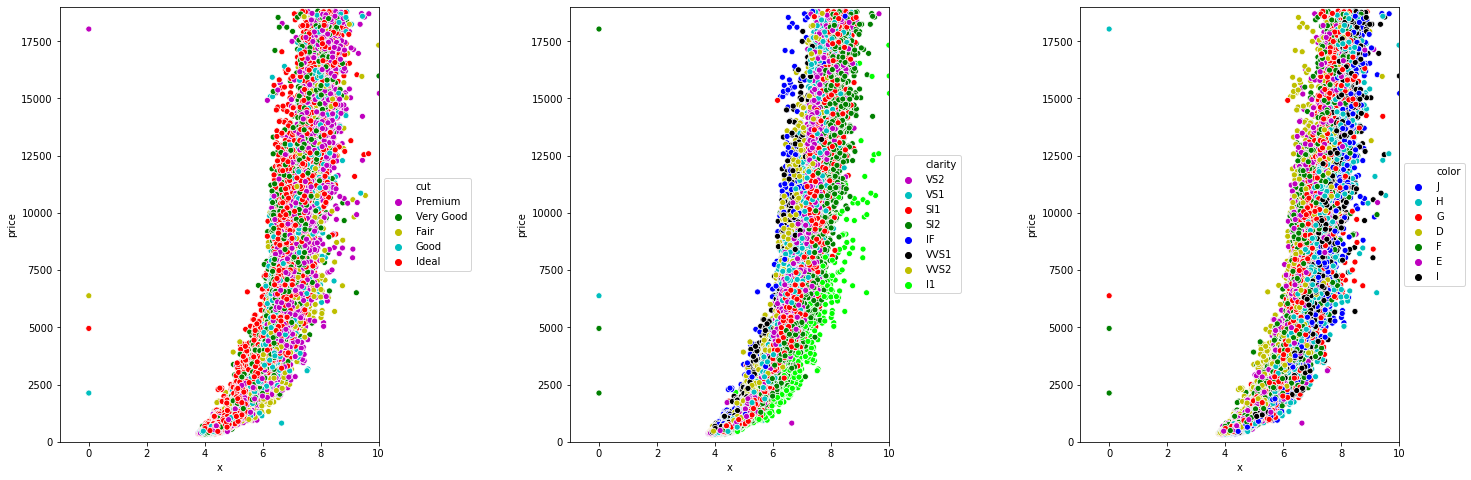

In [35]:
scatter_x_price(data)

In [ ]:
# The x value have an influence on price 
# In the correlation matrix you can see the correlation factor = 0.89
# In this chart you can see the different price influence of the characteristics of the criteria cut, clarity and color


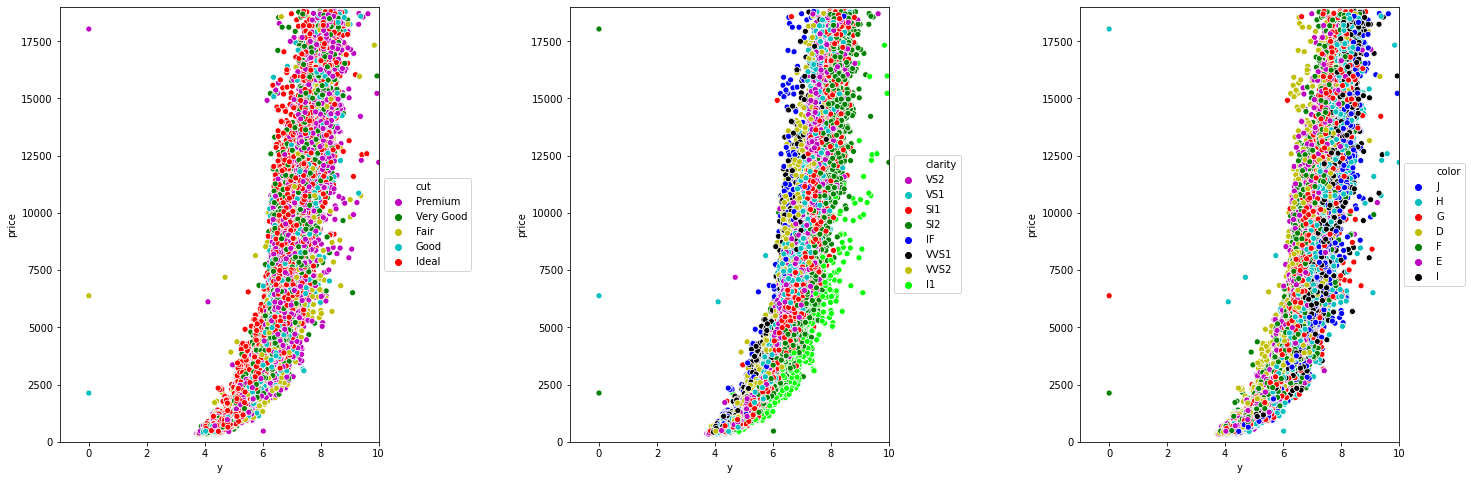

In [38]:
scatter_y_price(data)

In [ ]:
# The chart is similar to the x value chart.

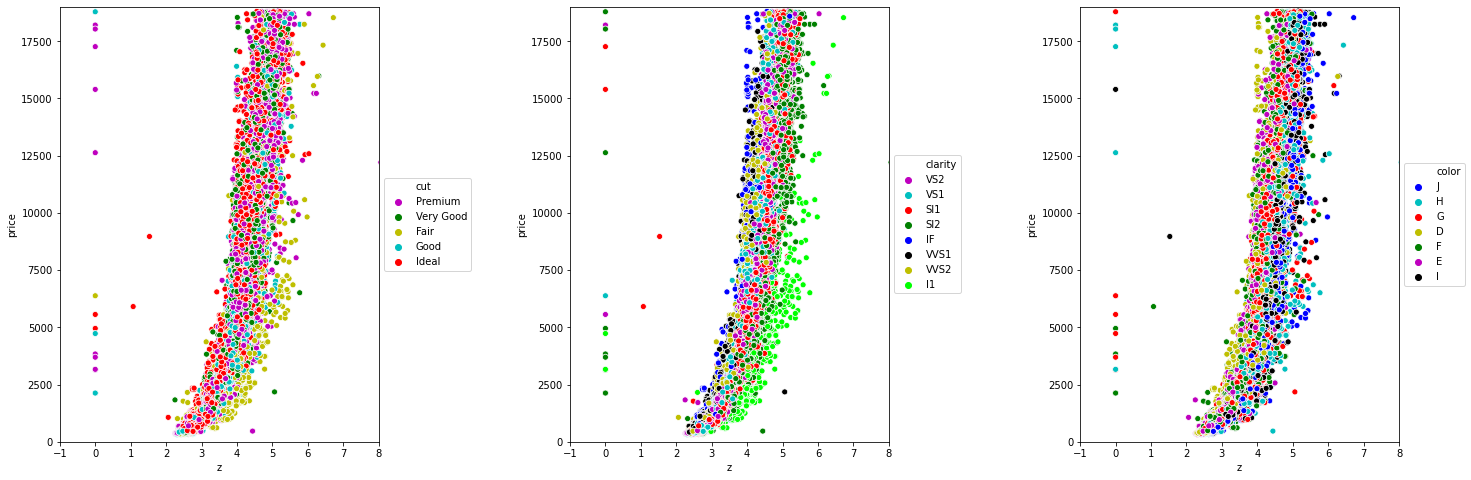

In [39]:
scatter_z_price(data)

In [ ]:
# The chart is similar to the x and y value chart
# There seem to be several diamonds with the z value 0

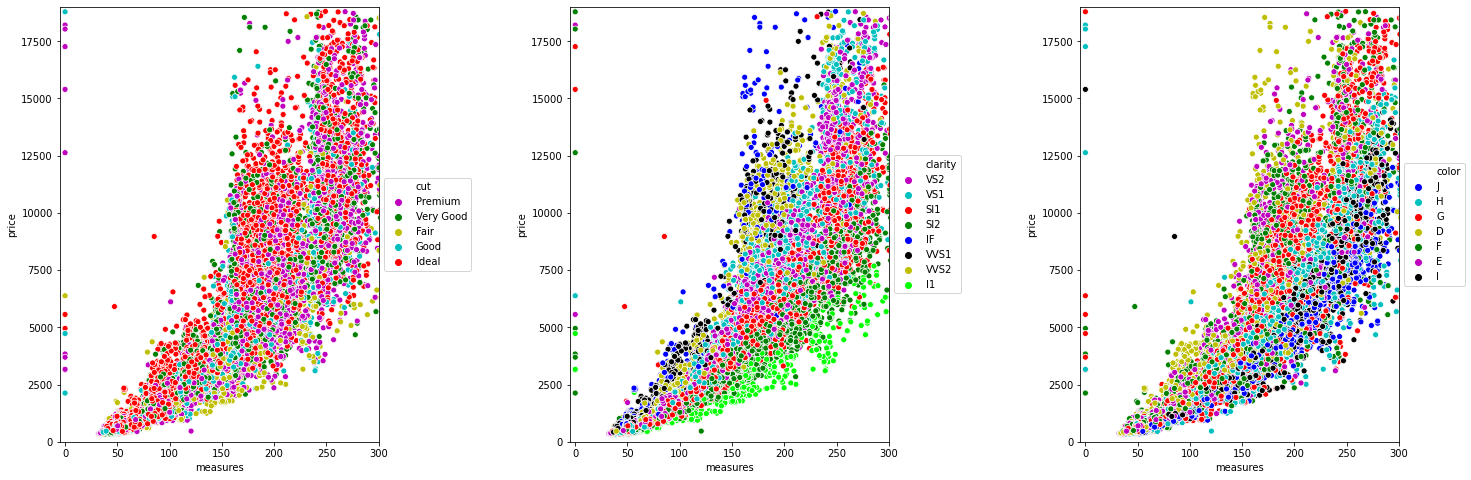

In [45]:
scatter_measures_price(data)

In [76]:
# Summary of findings:
# The following numeric values have a positive correlation with the price: x, y, z, carat, measures.
# Table and depth value, does not have a correlation with the price, but it seems that they have an influence on price and on the cut characteristics. 
# Each of the characteristics of the non numeric criterias seems to have an influence on price, however at least in the color criteria, this characteristics seem not to have the 
# strongest influence on price, another (of multiple others) influence(s) seems to be higher.

In [ ]:
# In the following cells more analysis is done, with filtering resp. binning the data.

210


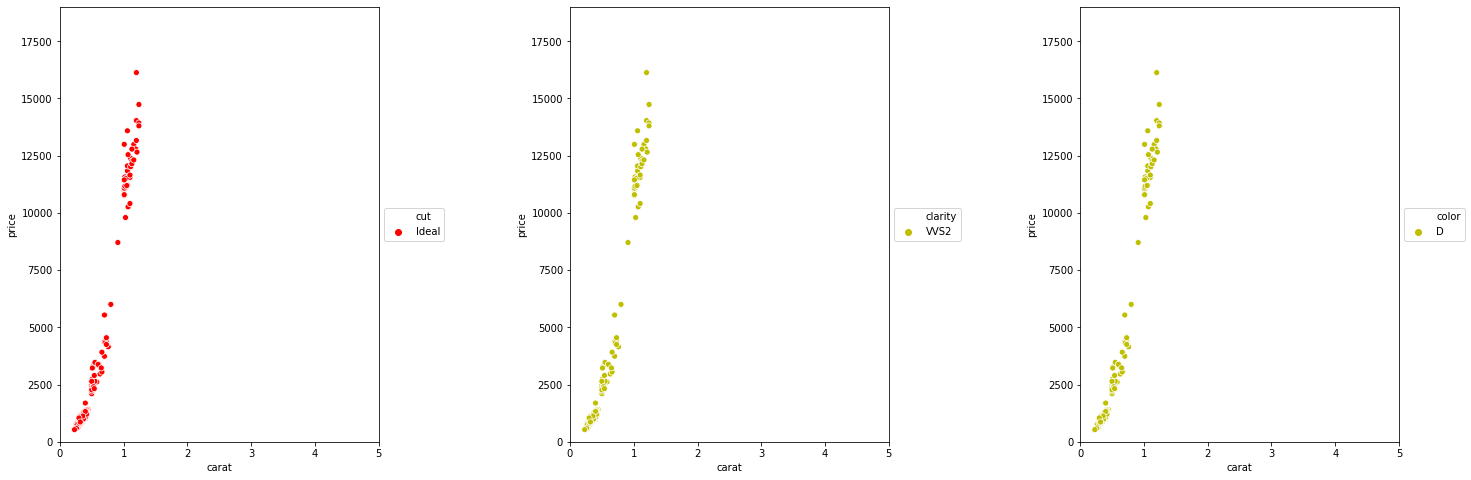

In [46]:
# In the next scatter plots, a dataset will be scattered, which is filetered with "high priced " non-numeric characteristics.
# The data set is filtered with Ideal & VVS2 & D
scatter_carat_price(get_df_filtered_cut_clarity_color('Ideal','VVS2','D', data))

76


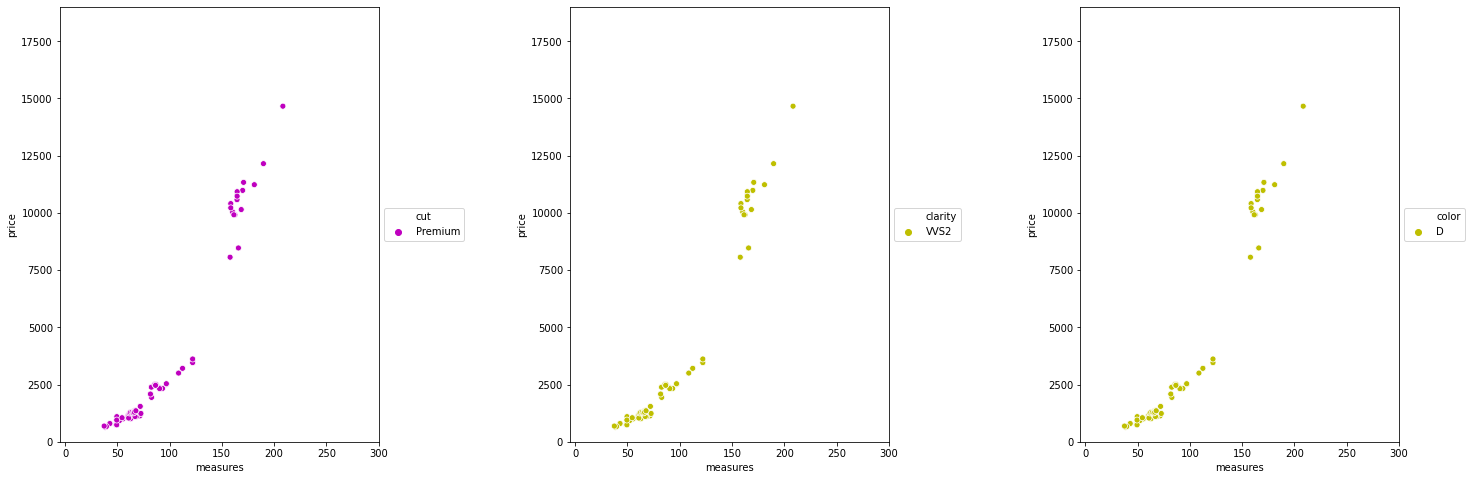

In [47]:
scatter_measures_price(get_df_filtered_cut_clarity_color('Premium','VVS2','D',data))

In [ ]:
# Although all diamonds have "high" non numeric value, there are some diamonds with lower prices. Higher priced diamonds have a higher carat 
# value or higher measures

210


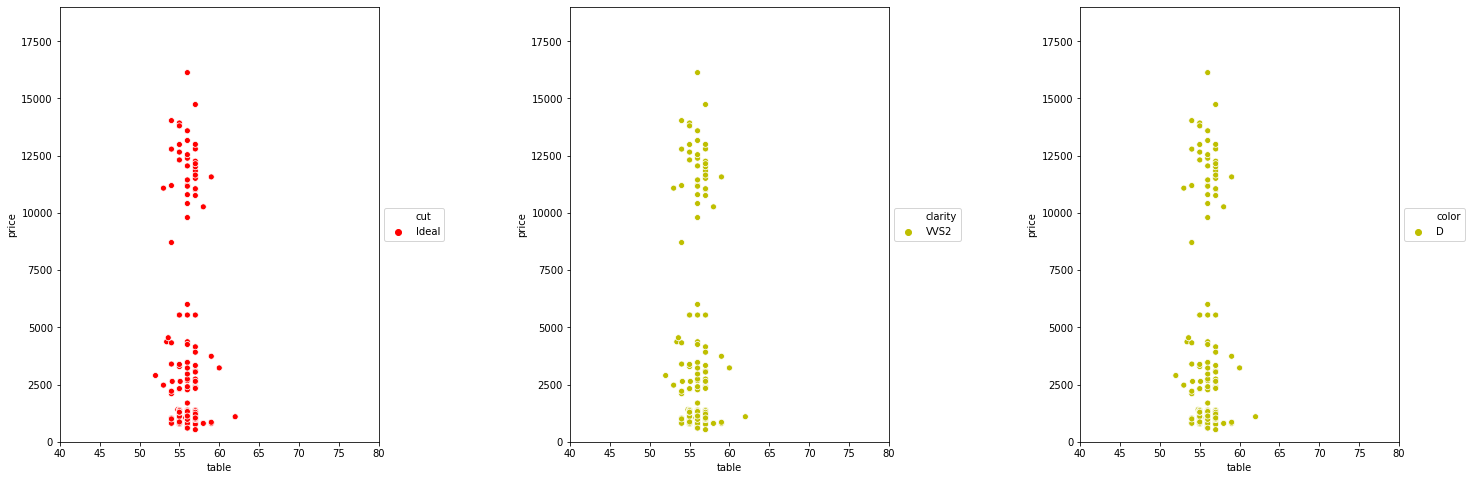

In [48]:
scatter_table_price(get_df_filtered_cut_clarity_color('Ideal','VVS2','D', data))

In [ ]:
# In the following, some "low-priced" criterias of the non-numerics, with high prices will be analyzed.
# The used data set is filtered with fair & I1 & J and binned with prices above 17000

229
1


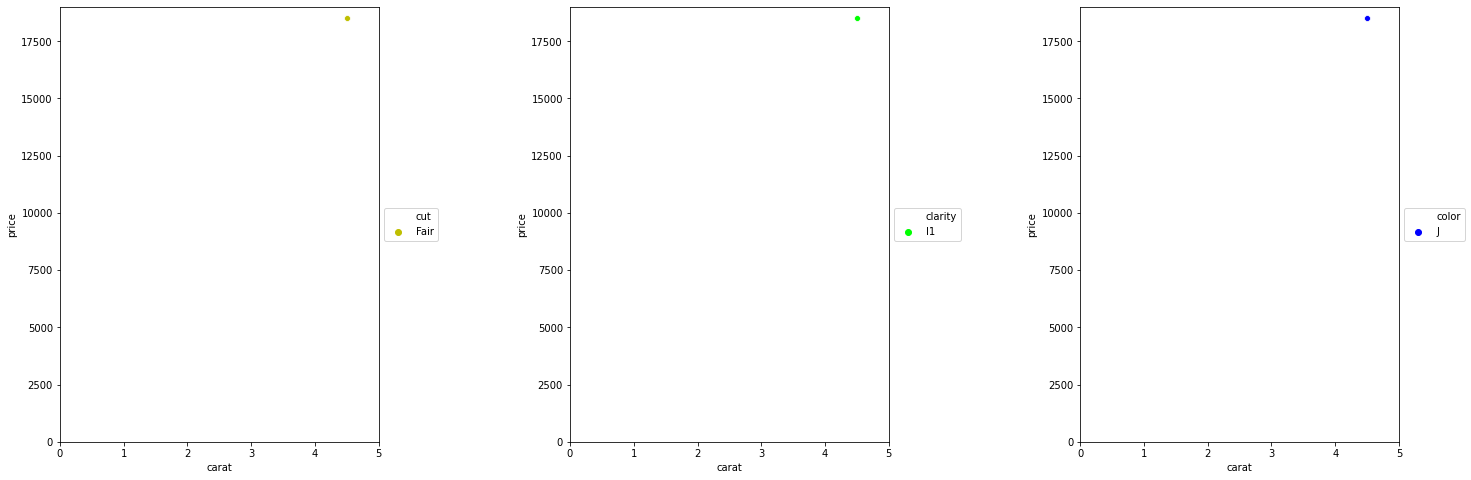

In [49]:
scatter_carat_price(get_df_filtered_cut_clarity_color('Fair','I1','J', get_df_binned_price(9)))

In [50]:
get_df_filtered_cut_clarity_color('Fair','I1','J', get_df_binned_price(9))


229
1


carat   cut color clarity  depth  table  price      x      y     z  \
31083    4.5  Fair     J      I1   65.8   58.0  18531  10.23  10.16  6.72   

           prop    measures binned  
31083  0.993157  698.455296      9

In [ ]:
# There is only one diamond with this criteria, and it has a very high carat value, and very high values x,y,z

In [ ]:
# In the following scatter, different data sets will be considered. For each criteria a "high value" characteristic is chosen. 

16220
3799
5049


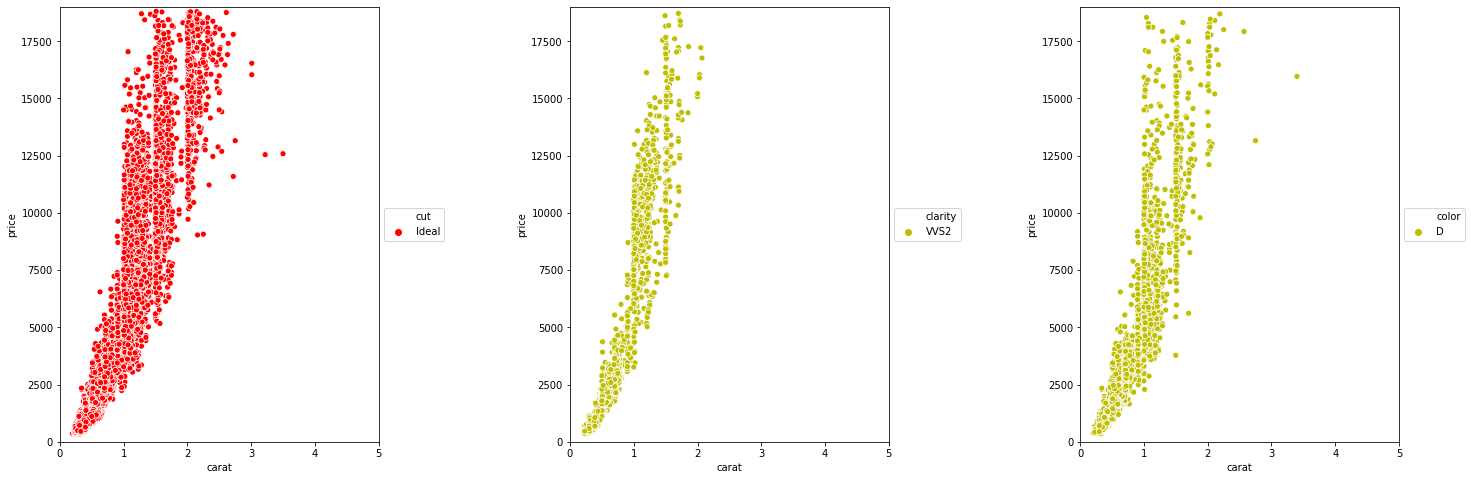

In [51]:

scatter_carat_price_filtered(get_df_filtered_cut('Ideal', data), get_df_filtered_clarity('VVS2', data), get_df_filtered_color('D',data))

In [ ]:
# The same is done with the "low valued" characteristics

1217
563
2140


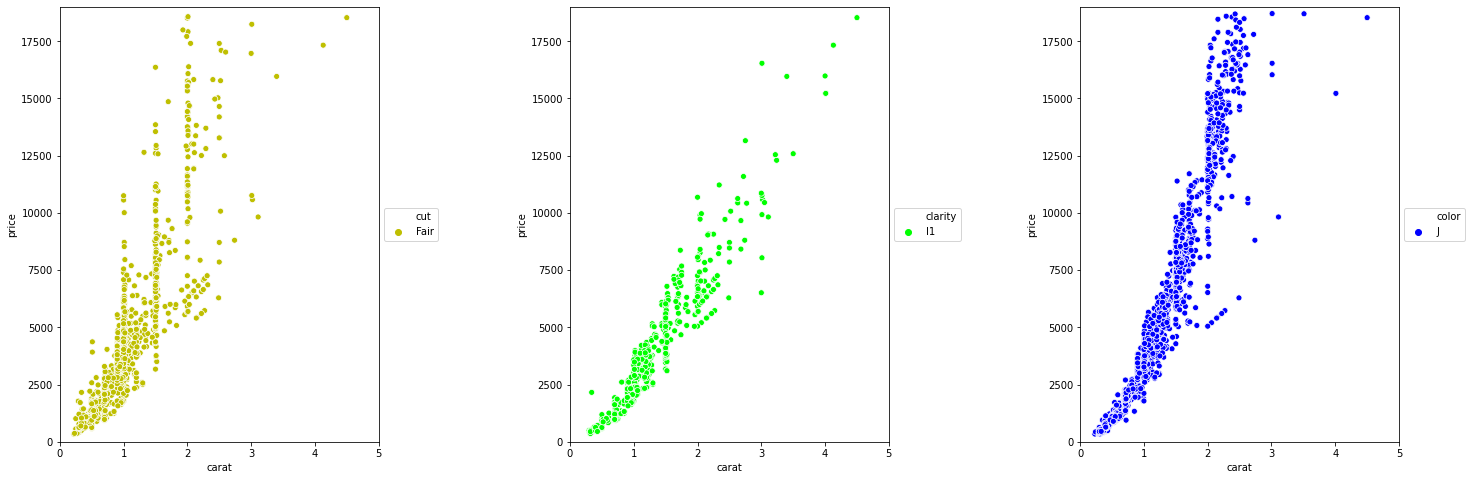

In [52]:
scatter_carat_price_filtered(get_df_filtered_cut('Fair', data), get_df_filtered_clarity('I1', data), get_df_filtered_color('J',data))

1753


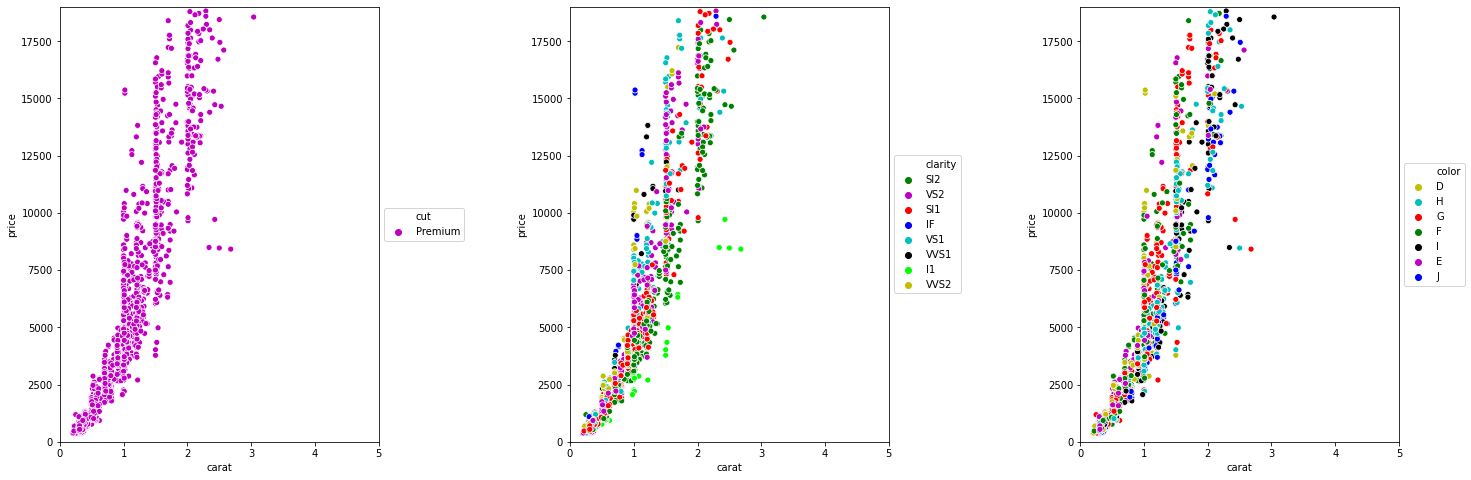

In [53]:
# Does the table, influence the price distribution of diamonds within a "cut category"?

table_filter = data['table'].between(59.5,60.5)
df_table_filter = data[table_filter]
scatter_carat_price(get_df_filtered_cut('Premium', df_table_filter))

229
There are 42 diamonds in the list which have a carat value below 2  the min. mean and max price is 18014 18400.54761904762 18806


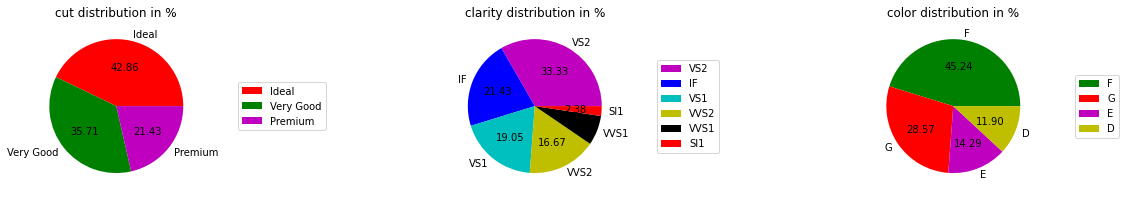

In [54]:
# Are there high priced diamonds, with a relatively low carat value?
filter_carat_lower(2, get_df_binned_price(9))

229
42


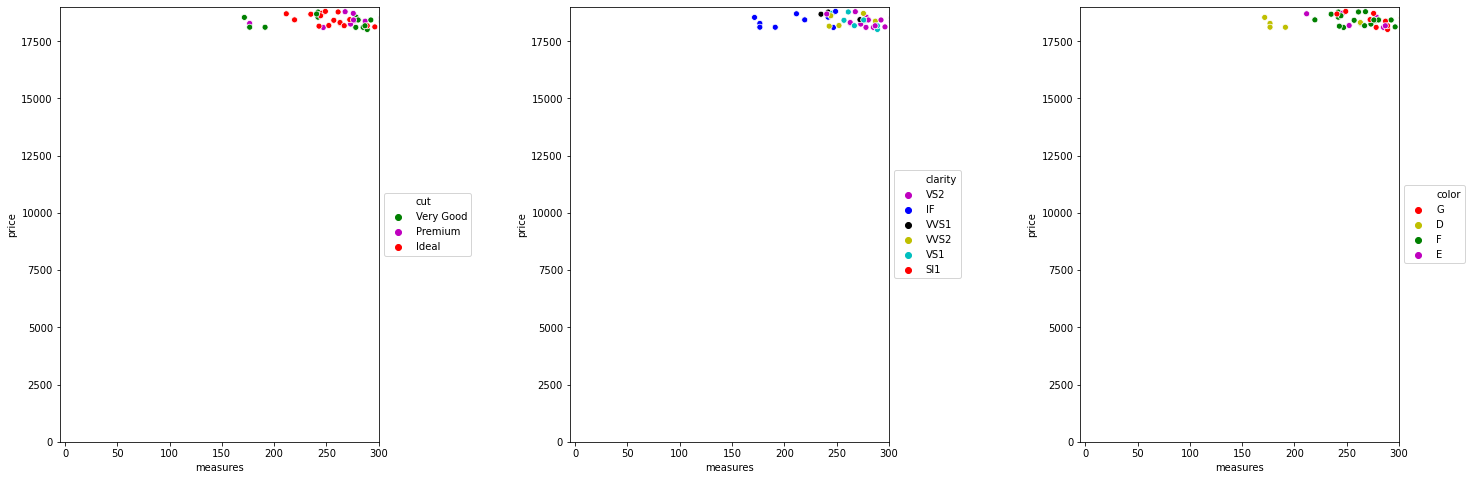

In [56]:
scatter_measures_price(get_df_filter_carat_lower(2, get_df_binned_price(9)))

In [ ]:
# This 42 high priced diamonds, with a relatively low carat value, have high measures and seem to have "high" non_numeric values like for example the color "D".

In [ ]:
# Are all diamonds with high measures expensive?

3132


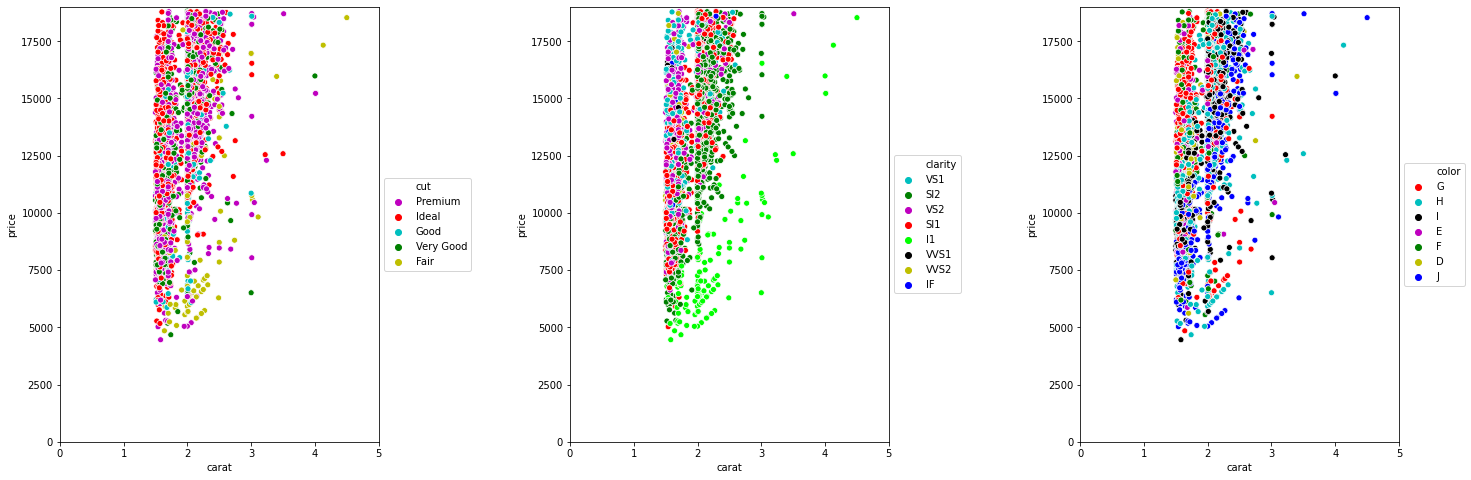

In [57]:
scatter_carat_price(get_df_filtered_measures_higher(250,data))